In [48]:
import numpy as np
import os,sys

import pandas as pd
import seaborn as sb


from keras.models import Sequential # Class
from keras.models import load_model # model 사용
from keras.layers import Dense # Class
from keras.layers import Dropout # Dropout 처리
from keras.callbacks import EarlyStopping  # 학습 자동 중지
from keras.callbacks import ModelCheckpoint # 우수한 학습모델 저장
from keras import regularizers


from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold # K겹 교차 검증

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

%matplotlib inline

In [49]:
# 데이터 준비
data = np.loadtxt('./wine_1.csv', delimiter=',', dtype=np.float64)
print(type(data))
print(data.shape)
print(data)
X = data[:, 0:12] # 0 ~ 11
Y = data[:, 12]   # 12

<class 'numpy.ndarray'>
(6437, 13)
[[ 6.7    0.675  0.07  ... 10.1    5.     1.   ]
 [ 6.9    0.685  0.    ... 10.6    6.     1.   ]
 [ 8.3    0.655  0.12  ...  9.8    5.     1.   ]
 ...
 [ 6.5    0.24   0.19  ...  9.4    6.     0.   ]
 [ 5.5    0.29   0.3   ... 12.8    7.     0.   ]
 [ 6.     0.21   0.38  ... 11.8    6.     0.   ]]


In [50]:
# 복잡한 모델(과대/과소 적합 발생 모델)
model = Sequential()
# 과대적합 모델
model.add(Dense(20, input_shape=(12,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이항분류

model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): # 폴더가 존재하지 않으면 생성
    os.mkdir(MODEL_DIR)
modelpath='./model/{epoch:04d}-{val_acc:.4f}.h5'    
# 검증 정확도가 개선되었을 때만 학습 모델 파일로 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_acc', verbose=1, save_best_only=True)

hist = model.fit(X, Y, validation_split = 0.33, shuffle=True, epochs=1000, batch_size=10, callbacks=[early_stopping, checkpointer ])

Train on 4312 samples, validate on 2125 samples
Epoch 1/1000
4312/4312 [==============================] - 1s 254us/step - loss: 0.4683 - acc: 0.8813 - val_loss: 0.1594 - val_acc: 0.9511

Epoch 00001: val_acc improved from -inf to 0.95106, saving model to ./model/0001-0.9511.h5
Epoch 2/1000
4312/4312 [==============================] - 1s 146us/step - loss: 0.2158 - acc: 0.9186 - val_loss: 0.1640 - val_acc: 0.9468

Epoch 00002: val_acc did not improve from 0.95106
Epoch 3/1000
4312/4312 [==============================] - 1s 153us/step - loss: 0.1975 - acc: 0.9251 - val_loss: 0.1051 - val_acc: 0.9685

Epoch 00003: val_acc improved from 0.95106 to 0.96847, saving model to ./model/0003-0.9685.h5
Epoch 4/1000
4312/4312 [==============================] - 1s 151us/step - loss: 0.1771 - acc: 0.9344 - val_loss: 0.0765 - val_acc: 0.9812

Epoch 00004: val_acc improved from 0.96847 to 0.98118, saving model to ./model/0004-0.9812.h5
Epoch 5/1000
4312/4312 [==============================] - 1s 149us/

4312/4312 [==============================] - 1s 153us/step - loss: 0.0763 - acc: 0.9754 - val_loss: 0.0421 - val_acc: 0.9911

Epoch 00042: val_acc did not improve from 0.99435
Epoch 43/1000
4312/4312 [==============================] - 1s 159us/step - loss: 0.0716 - acc: 0.9787 - val_loss: 0.0436 - val_acc: 0.9878

Epoch 00043: val_acc did not improve from 0.99435
Epoch 44/1000
4312/4312 [==============================] - 1s 184us/step - loss: 0.0764 - acc: 0.9766 - val_loss: 0.0848 - val_acc: 0.9671

Epoch 00044: val_acc did not improve from 0.99435
Epoch 45/1000
4312/4312 [==============================] - 1s 168us/step - loss: 0.0825 - acc: 0.9736 - val_loss: 0.0487 - val_acc: 0.9873

Epoch 00045: val_acc did not improve from 0.99435
Epoch 46/1000
4312/4312 [==============================] - 1s 172us/step - loss: 0.0768 - acc: 0.9761 - val_loss: 0.1168 - val_acc: 0.9624

Epoch 00046: val_acc did not improve from 0.99435
Epoch 47/1000
4312/4312 [==============================] - 1s 15

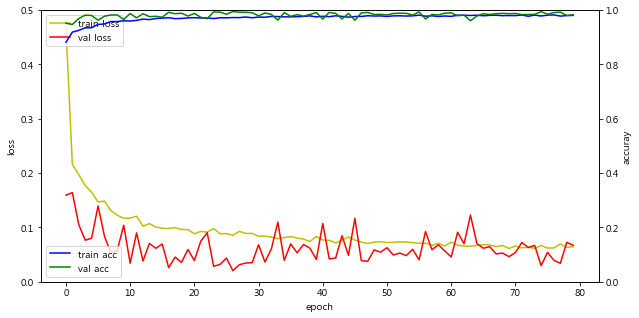

In [52]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 0.5]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [53]:
#del model


In [55]:
model = load_model('./model/0003-0.9859.h5')
data = np.loadtxt('./wine_test.csv', delimiter=',', dtype=np.float64)
X = data[:,0:12]
Y = data[:,12]

test_loss, test_acc = model.evaluate(X,Y, batch_size=1)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

60/60 [==============================] - 0s 3ms/step
손실값 :  0.3155657429851999  / 정확도 :  91.66666666666666 %
